In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')

# Reading Dataset

In [54]:
df=pd.read_csv(r'..\dataset\Gemstones\cubic_zirconia.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


### Data Description and Cleaning

In [55]:
df.shape

(26967, 11)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [57]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

* There are null values in one column

In [58]:
# Dropping 'Unnamed 0' column
df= df.iloc[:,1:]
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [10]:
df.duplicated().sum()

34

In [12]:
# Dropping duplicates
df.drop_duplicates(keep='first',inplace=True)

# Univariate Analysis

In [21]:
numerical_columns = df.select_dtypes(include=np.number).columns
categorical_columns = df.select_dtypes(include = np.object).columns

In [22]:
df[numerical_columns].describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729346,5.733102,3.537769,3937.526120
std,0.477237,1.412243,2.232156,1.127367,1.165037,0.719964,4022.551862
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [23]:
df[categorical_columns].describe()

,cut,color,clarity
count,26933,26933,26933
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5653,6565


In [25]:
for i in categorical_columns:
    print(i.upper())
    print(df[i].value_counts(),end='\n\n')
    

CUT
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

COLOR
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

CLARITY
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64



CUT


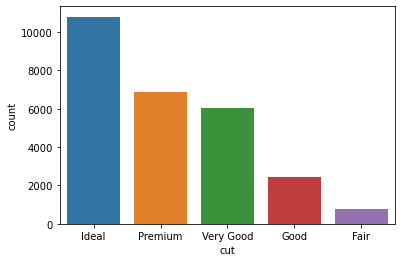

COLOR


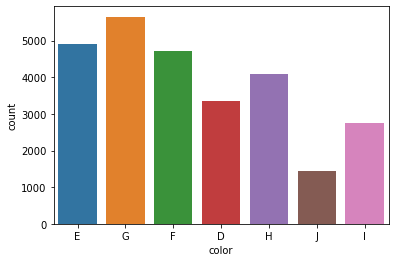

CLARITY


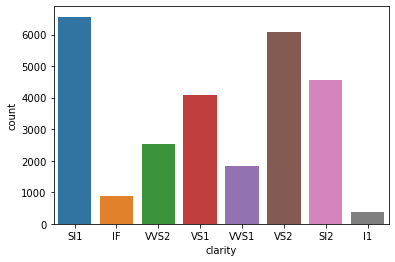

In [29]:
for i in categorical_columns:
    print(i.upper())
    sns.countplot(df[i])
    plt.show()

CARAT


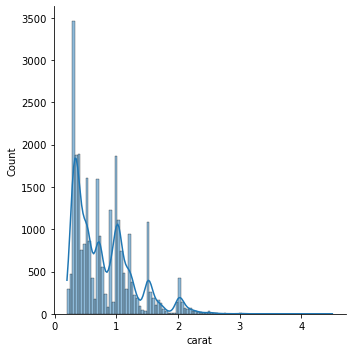

DEPTH


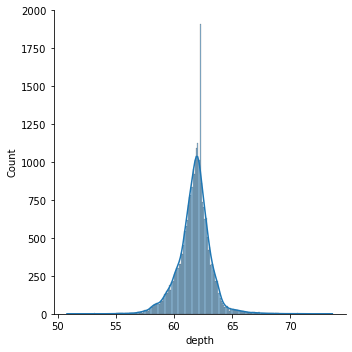

TABLE


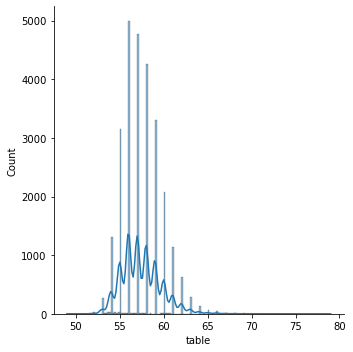

X


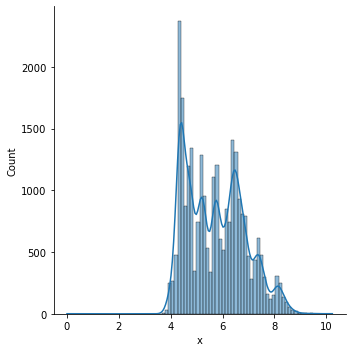

Y


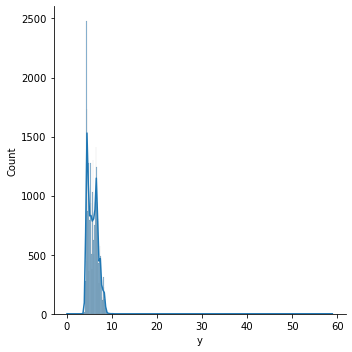

Z


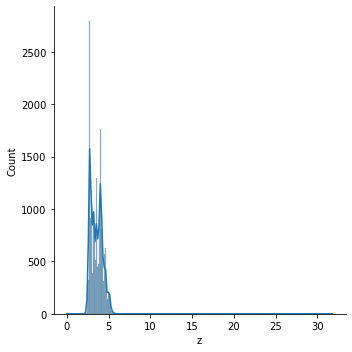

PRICE


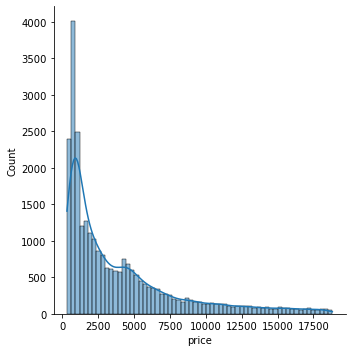

In [31]:
for i in df[numerical_columns].columns:
    print(i.upper())
    sns.displot(df[i], kde = True)
    plt.show()

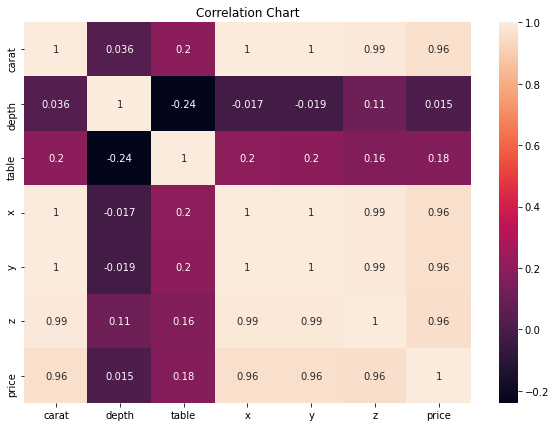

In [63]:
plt.figure(figsize=(10,7))
plt.title('Correlation Chart')
sns.heatmap(df[numerical_columns].corr(method='spearman'), annot=True)
plt.show()

### Pairplot of the Dataset

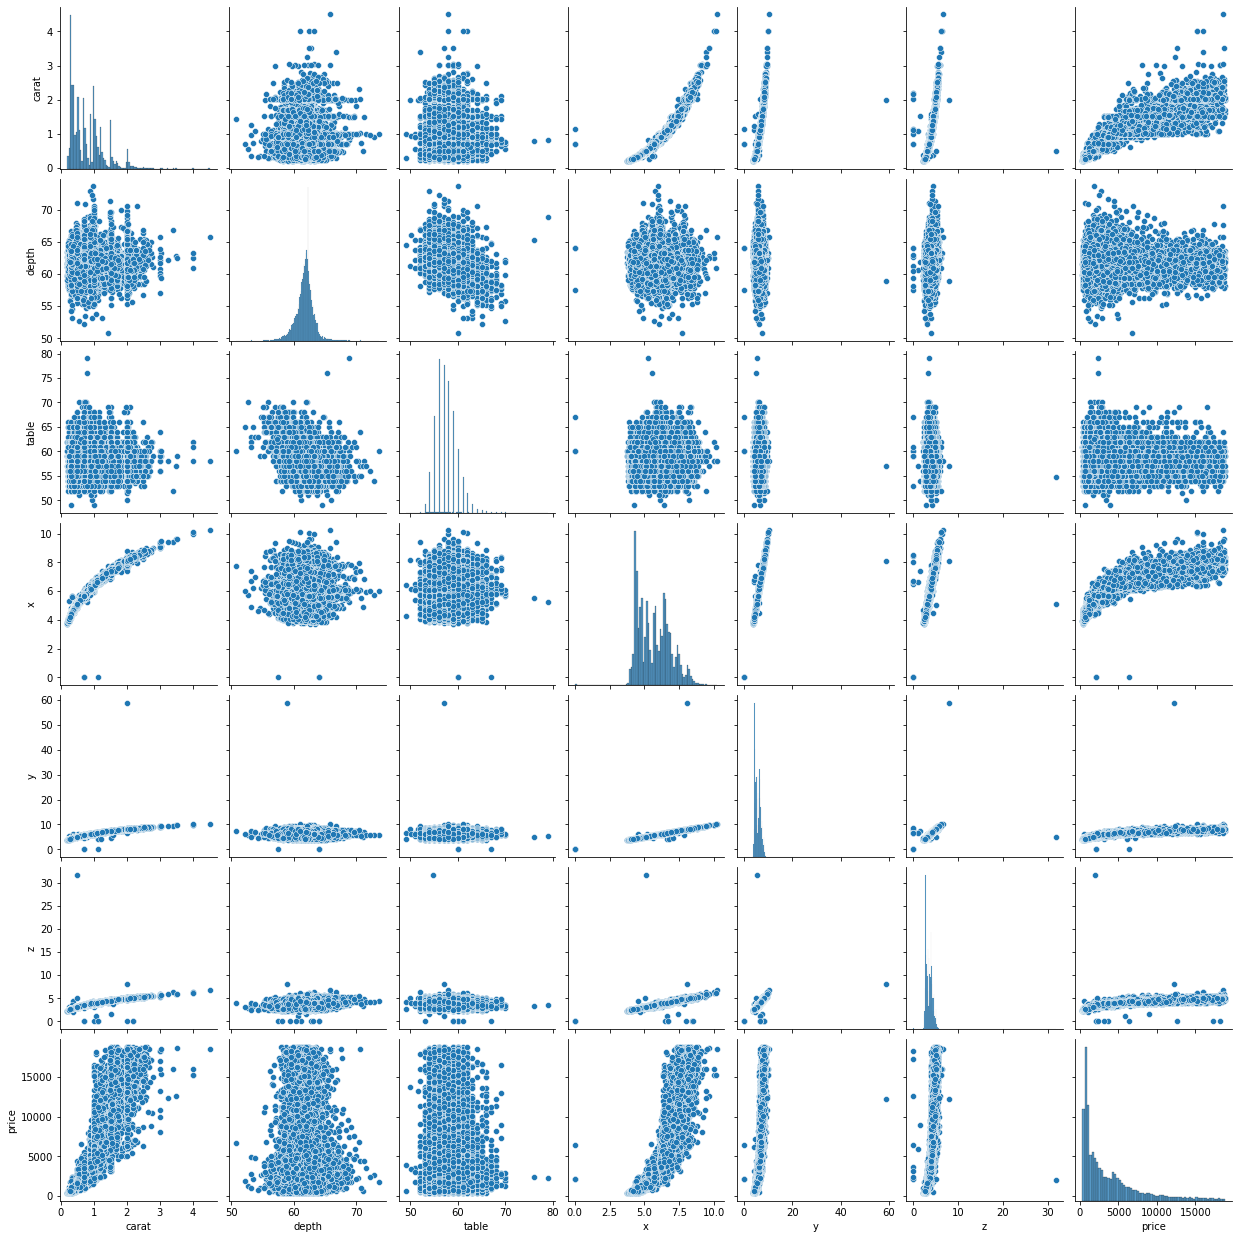

In [64]:
sns.pairplot(df)
plt.show()

# Encoding

In [66]:
print('cut:\t\t',df.cut.unique())
print('clarity:\t',df.clarity.unique())
print('color:\t\t',sorted(df.color.unique()))

cut:		 ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
clarity:	 ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']
color:		 ['D', 'E', 'F', 'G', 'H', 'I', 'J']


In [67]:
cut_map={'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
clarity_map={'SI1':3, 'IF':1, 'VVS2':6, 'VS1':5, 'VVS1':7, 'VS2':4, 'SI2':2, 'I1':8}
color_map= {'D':1, 'E':2, 'F':3, 'G':4, 'H':5, 'I':6, 'J':7}

In [68]:
df['cut']=df.cut.map(cut_map)
df['clarity']=df.clarity.map(clarity_map)
df['color']=df.color.map(color_map)

In [69]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779
